In [1]:
# LOAD LIBRARIES
import pandas as pd, numpy as np # CPU libraries
import matplotlib.pyplot as plt, gc, os
import seaborn as sns

In [2]:
# load dataset
df = pd.read_csv('accepted_2007_to_2018Q4.csv')
df.head(2)

/tmp/ipykernel_238/184982313.py:2: DtypeWarning: Columns (0,19,49,59,118,129,130,131,134,135,136,139,145,146,147) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('accepted_2007_to_2018Q4.csv')


,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,68407277,NaN,3600.0,3600.0,3600.0,36 months,13.99,123.03,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,68355089,NaN,24700.0,24700.0,24700.0,36 months,11.99,820.28,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df.shape

(2260701, 151)

In [4]:
# Tranform issue_d into datetime
df['issue_d'] = pd.to_datetime(df['issue_d'], format='%b-%Y')


In [5]:
# Filter only data from 2015 to 2018
df = df[(df["issue_d"] >= '2015-01-01')]

In [6]:
keep_list = ['loan_amnt',
              'funded_amnt',
              'term',
              'int_rate',
              'grade',
              'emp_title', 
              'emp_length',
              'home_ownership',
              'annual_inc',
              'verification_status',
              'issue_d',
              'loan_status',
              'purpose',
              'zip_code',
              'dti',
              'delinq_2yrs',
              'earliest_cr_line',
              'open_acc',
              'pub_rec',
              'fico_range_high',
              'fico_range_low',
              'revol_bal',
              'revol_util',
    
]

numerical_variables = ['loan_amnt', 
                       'funded_amnt', 
                       'int_rate', 
                       'annual_inc', 
                       'dti', 
                       'delinq_2yrs', 
                       'fico_range_low', 
                       'fico_range_high', 
                       'open_acc', 
                       'pub_rec', 
                       'revol_bal', 
                       'revol_util']

categorical_variables = ['term',
                        'grade',
                        'emp_title', 
                        'emp_length',
                        'home_ownership',
                        'verification_status',
                        'purpose',
                        'zip_code',]

drop_list = [col for col in df.columns if col not in keep_list]
df.drop(labels=drop_list, axis=1, inplace=True)

In [7]:
df.shape

(1794323, 23)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1794323 entries, 0 to 2260698
Data columns (total 23 columns):
 #   Column               Dtype         
---  ------               -----         
 0   loan_amnt            float64       
 1   funded_amnt          float64       
 2   term                 object        
 3   int_rate             float64       
 4   grade                object        
 5   emp_title            object        
 6   emp_length           object        
 7   home_ownership       object        
 8   annual_inc           float64       
 9   verification_status  object        
 10  issue_d              datetime64[ns]
 11  loan_status          object        
 12  purpose              object        
 13  zip_code             object        
 14  dti                  float64       
 15  delinq_2yrs          float64       
 16  earliest_cr_line     object        
 17  fico_range_low       float64       
 18  fico_range_high      float64       
 19  open_acc             float

In [9]:
df.describe()

,loan_amnt,funded_amnt,int_rate,annual_inc,issue_d,dti,delinq_2yrs,fico_range_low,fico_range_high,open_acc,pub_rec,revol_bal,revol_util
count,1.794323e+06,1.794323e+06,1.794323e+06,1.794323e+06,1794323,1.792612e+06,1.794323e+06,1.794323e+06,1.794323e+06,1.794323e+06,1.794323e+06,1.794323e+06,1.792861e+06
mean,1.523661e+04,1.523659e+04,1.290164e+01,7.921845e+04,2017-01-13 07:09:30.300665856,1.924170e+01,3.126488e-01,6.992316e+02,7.032319e+02,1.172297e+01,2.071322e-01,1.676983e+04,4.881974e+01
min,1.000000e+03,1.000000e+03,5.310000e+00,0.000000e+00,2015-01-01 00:00:00,-1.000000e+00,0.000000e+00,6.600000e+02,6.640000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,8.000000e+03,8.000000e+03,9.430000e+00,4.700000e+04,2016-01-01 00:00:00,1.205000e+01,0.000000e+00,6.750000e+02,6.790000e+02,8.000000e+00,0.000000e+00,5.831000e+03,2.980000e+01
50%,1.300000e+04,1.300000e+04,1.229000e+01,6.500000e+04,2017-02-01 00:00:00,1.812000e+01,0.000000e+00,6.900000e+02,6.940000e+02,1.100000e+01,0.000000e+00,1.120700e+04,4.830000e+01
75%,2.000000e+04,2.000000e+04,1.561000e+01,9.500000e+04,2018-02-01 00:00:00,2.499000e+01,0.000000e+00,7.150000e+02,7.190000e+02,1.500000e+01,0.000000e+00,2.022100e+04,6.760000e+01
max,4.000000e+04,4.000000e+04,3.099000e+01,1.100000e+08,2018-12-01 00:00:00,9.990000e+02,5.800000e+01,8.450000e+02,8.500000e+02,1.010000e+02,8.600000e+01,2.904836e+06,1.930000e+02
std,9.401695e+03,9.401696e+03,4.930004e+00,1.233243e+05,NaN,1.538244e+01,8.843963e-01,3.353838e+01,3.353937e+01,5.793524e+00,5.846403e-01,2.350181e+04,2.473695e+01


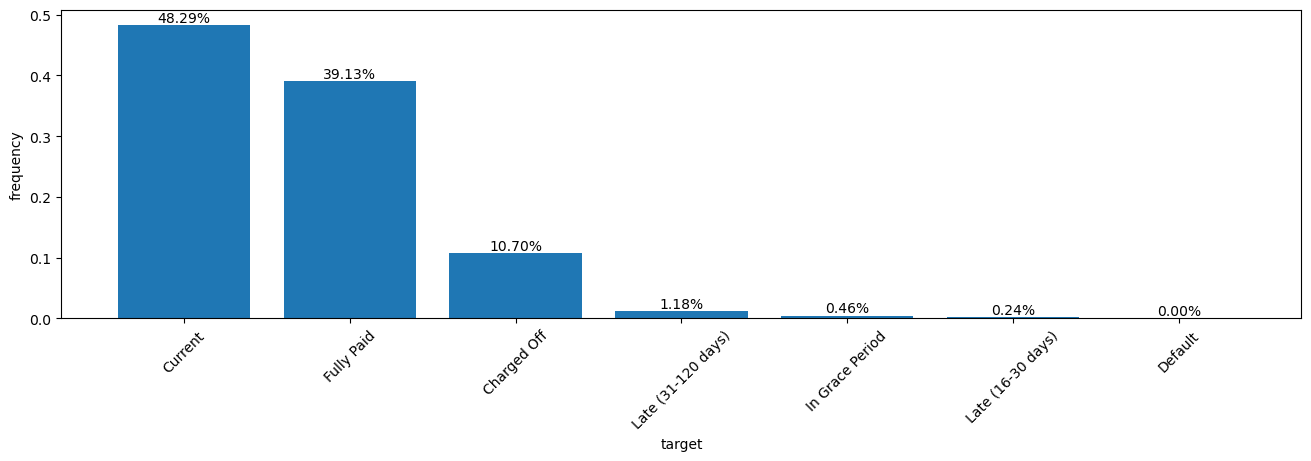

In [10]:
# Loan status distribution

temp = df['loan_status'].value_counts(normalize=True)
plt.figure(figsize=(16, 4))
plt.bar(temp.index, temp.values)
plt.xlabel('target')
plt.ylabel('frequency')

# Rotate the x-ticks by 45 degrees
plt.xticks(rotation=45)

# Add percentage labels on bars
for i, value in enumerate(temp.values):
    plt.text(temp.index[i], value, f"{value:.2%}", ha='center', va='bottom')

We take fully paid and charged off only

In [11]:
df = df[(df['loan_status'] == 'Fully Paid') | (df['loan_status'] == 'Charged Off')]

In [12]:
df.shape

(894251, 23)

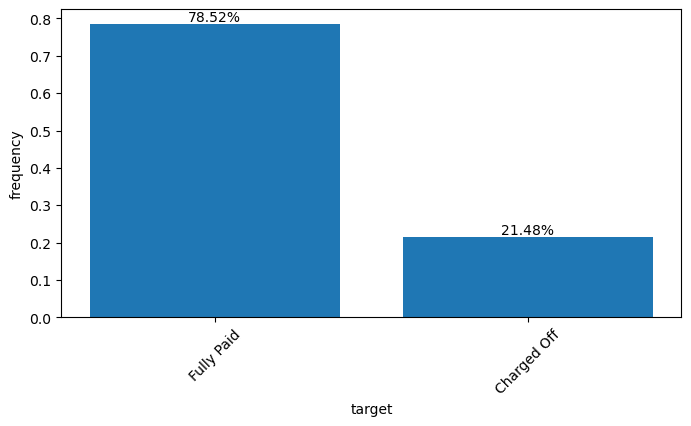

In [13]:
# Loan status distribution

temp = df['loan_status'].value_counts(normalize=True)
plt.figure(figsize=(8, 4))
plt.bar(temp.index, temp.values)
plt.xlabel('target')
plt.ylabel('frequency')

# Rotate the x-ticks by 45 degrees
plt.xticks(rotation=45)

# Add percentage labels on bars
for i, value in enumerate(temp.values):
    plt.text(temp.index[i], value, f"{value:.2%}", ha='center', va='bottom')

Create target variable named 'default' and drop loan_status

In [14]:
df['default'] = df['loan_status'].apply(lambda x: int(0) if x == 'Fully Paid' else int(1))

In [15]:
df = df.drop(columns=['loan_status'])

Remove all variables have only 1 value

In [16]:
constant_features = [col for col in df.columns if df[col].nunique() == 1]
print("Columns with only one unique value:", constant_features)

df = df.drop(columns=constant_features)

Columns with only one unique value: []


In [17]:
df.shape

(894251, 23)

# Missing Value

In [18]:
# Missing value and their percentage

missing_cols = df.columns[df.isnull().mean() > 0]
df[missing_cols].isnull().mean()

emp_title     0.065781
emp_length    0.064850
zip_code      0.000001
dti           0.000418
revol_util    0.000634
dtype: float64

### 1. Drop missing variables > 50%

In [19]:
missing_cols = df.columns[df.isnull().mean() > 0.5]

In [20]:
print(missing_cols)

Index([], dtype='object')


Drop variables

In [21]:
df = df.drop(columns=missing_cols)

In [22]:
df.shape

(894251, 23)

### 2. Fill remaining null variables with suitable values

In [23]:
missing_cols = df.columns[df.isnull().mean() > 0]

In [24]:
print(missing_cols)

Index(['emp_title', 'emp_length', 'zip_code', 'dti', 'revol_util'], dtype='object')


In [25]:
df[missing_cols].isnull().sum()

emp_title     58825
emp_length    57992
zip_code          1
dti             374
revol_util      567
dtype: int64

In [26]:
df[missing_cols].isnull().mean()

emp_title     0.065781
emp_length    0.064850
zip_code      0.000001
dti           0.000418
revol_util    0.000634
dtype: float64

In [27]:
# Fill with median
variables = ['dti', 'revol_util']

for variable in variables:
    df[variable].fillna(df[variable].median(), inplace=True) 

/tmp/ipykernel_238/2252016898.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(df[variable].median(), inplace=True)
/tmp/ipykernel_238/2252016898.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)'

In [28]:
# Fill with mode
variables = ['emp_title', 'emp_length', 'zip_code']
for variable in variables:
    df[variable].fillna(df[variable].mode()[0], inplace=True)


/tmp/ipykernel_238/3256916007.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[variable].fillna(df[variable].mode()[0], inplace=True)


In [29]:
df[missing_cols].isnull().sum()

emp_title     0
emp_length    0
zip_code      0
dti           0
revol_util    0
dtype: int64

In [30]:
df.shape

(894251, 23)

# Histogram & boxplot

In [31]:
numerical_variables = ['loan_amnt', 
                       'funded_amnt', 
                       'int_rate', 
                       'annual_inc', 
                       'dti', 
                       'delinq_2yrs', 
                       'fico_range_low', 
                       'fico_range_high', 
                       'open_acc', 
                       'pub_rec', 
                       'revol_bal', 
                       'revol_util']

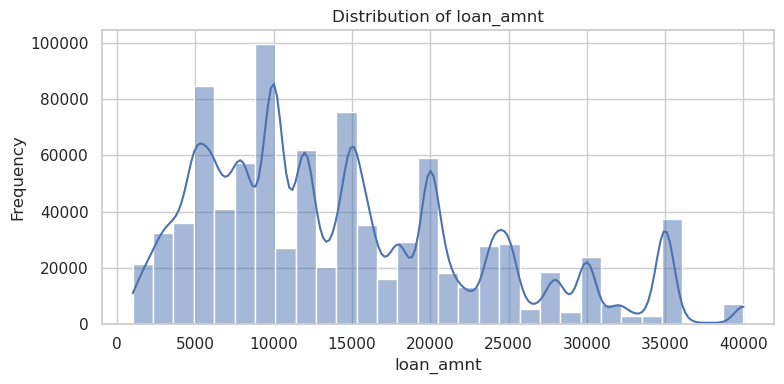

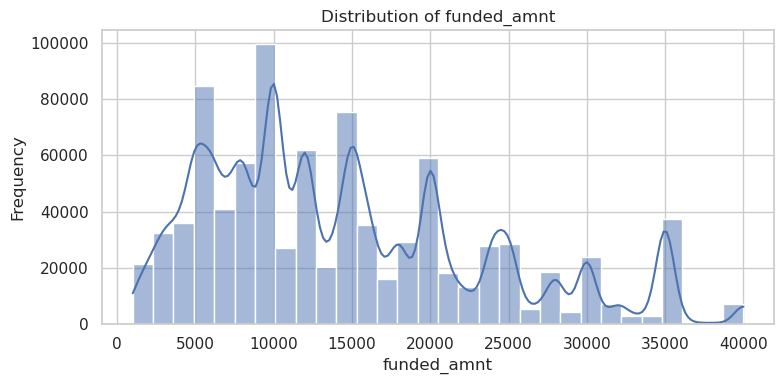

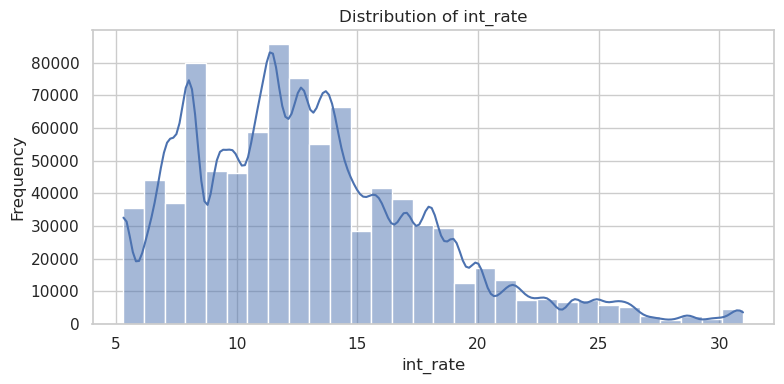

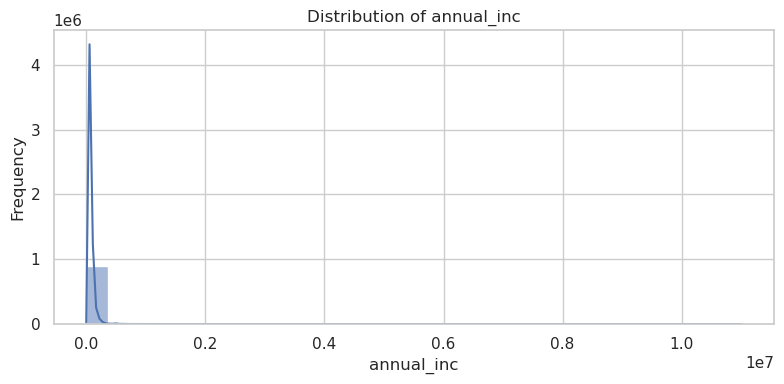

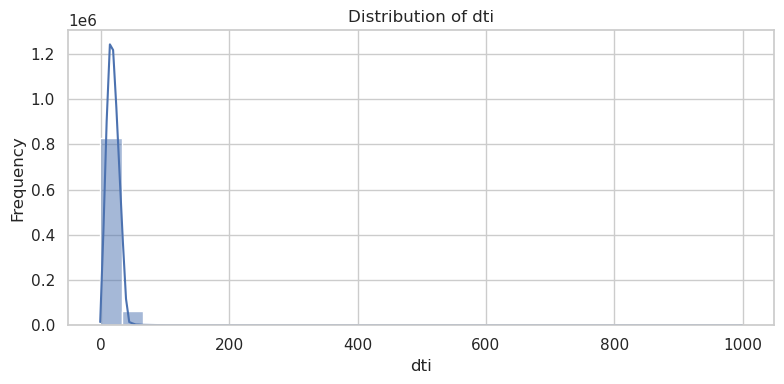

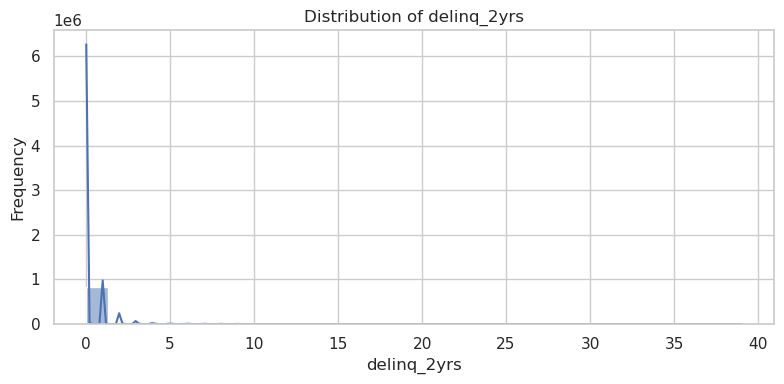

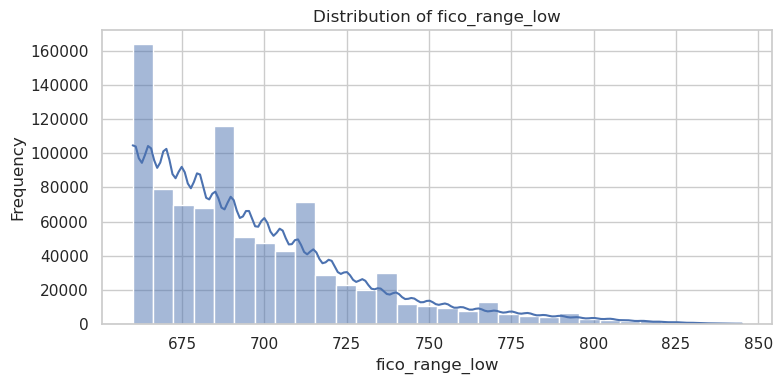

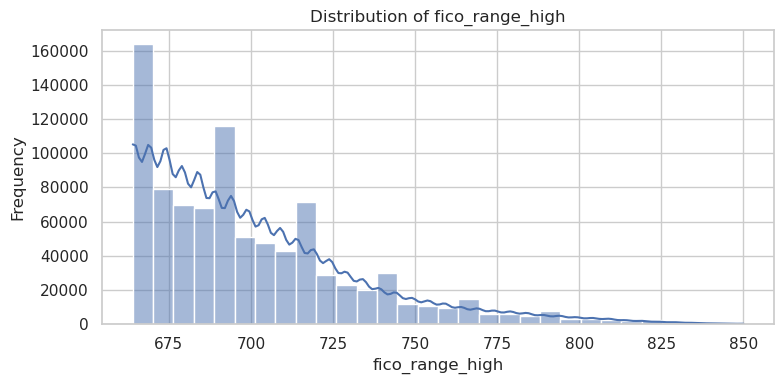

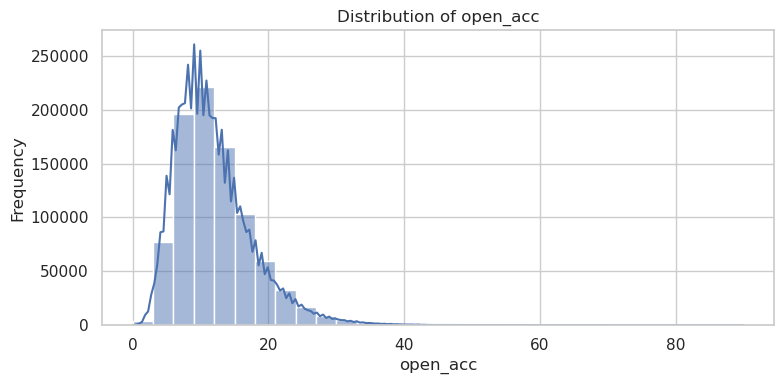

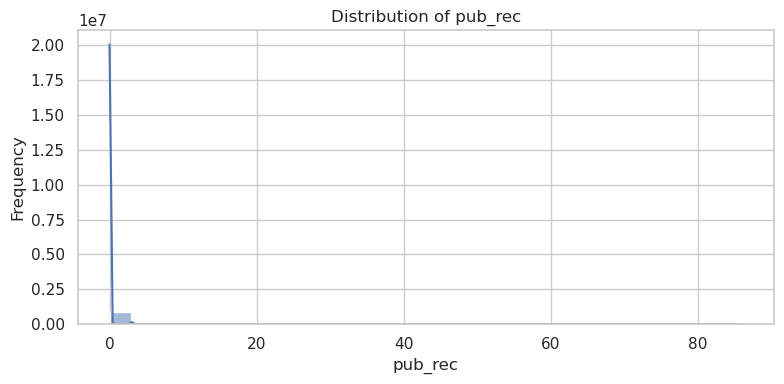

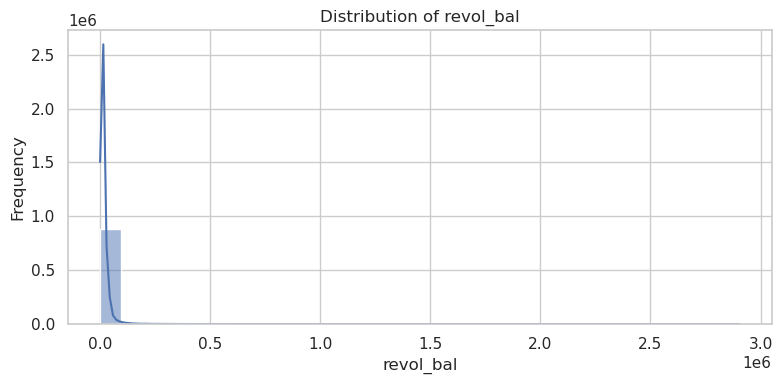

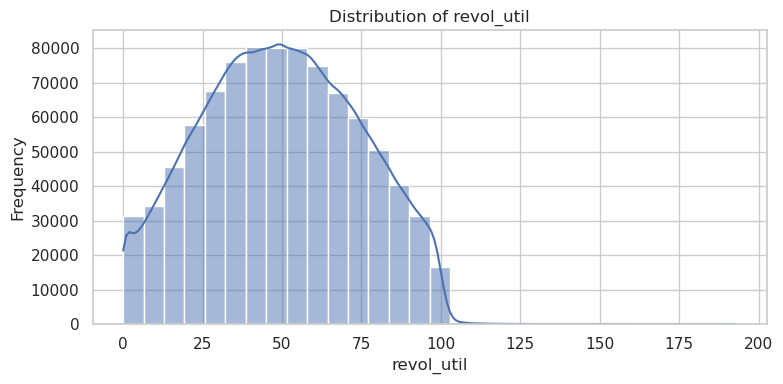

In [32]:

# Set the visual style
sns.set(style="whitegrid")

# Example 1: Histogram of 'Credit Amount'
for variable in numerical_variables:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title(f"Distribution of {variable}")
    plt.xlabel(f"{variable}")
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


In [33]:
categorical_variables

['term',
 'grade',
 'emp_title',
 'emp_length',
 'home_ownership',
 'verification_status',
 'purpose',
 'zip_code']

In [34]:
df['emp_length'].value_counts()

emp_length
10+ years    355664
2 years       81691
< 1 year      73051
3 years       72134
1 year        59891
5 years       54202
4 years       53402
8 years       39011
6 years       37331
7 years       34193
9 years       33681
Name: count, dtype: int64

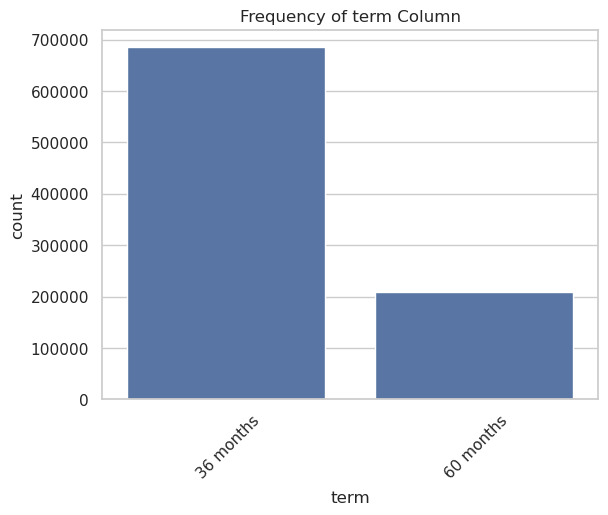

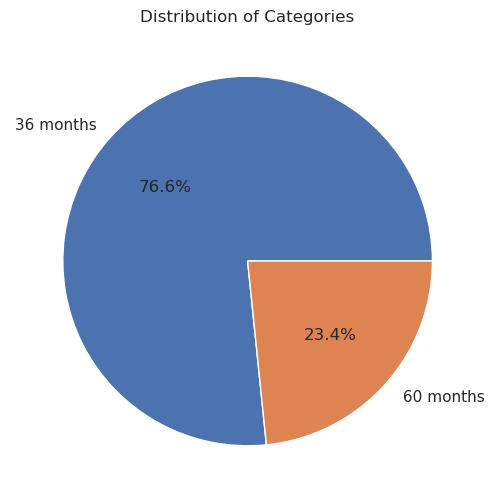

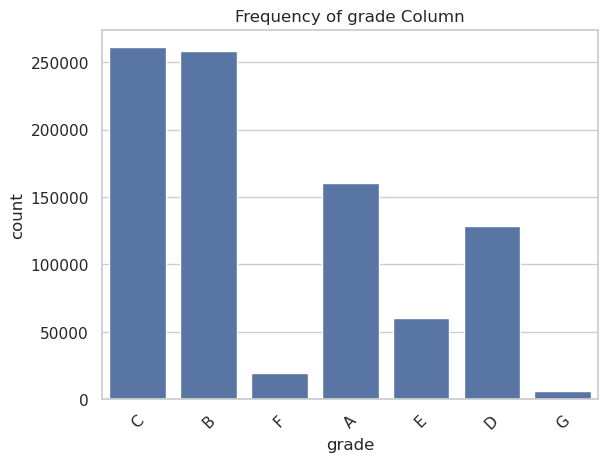

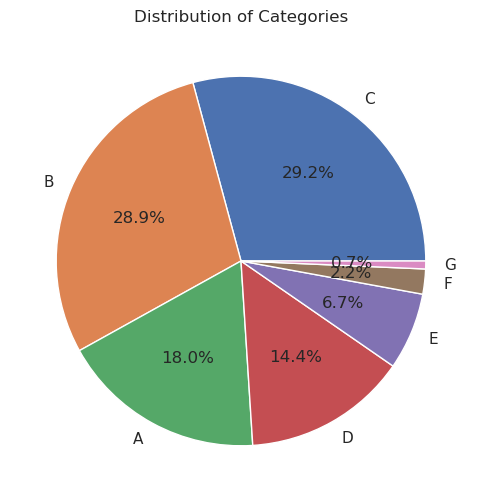

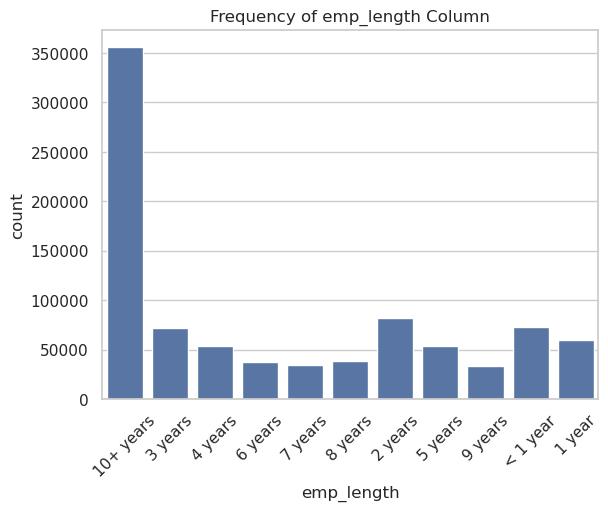

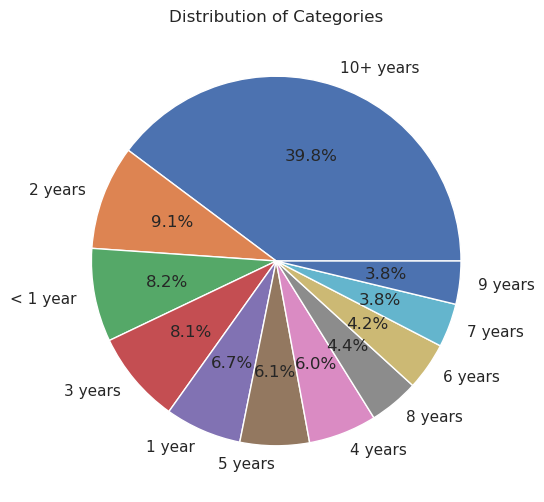

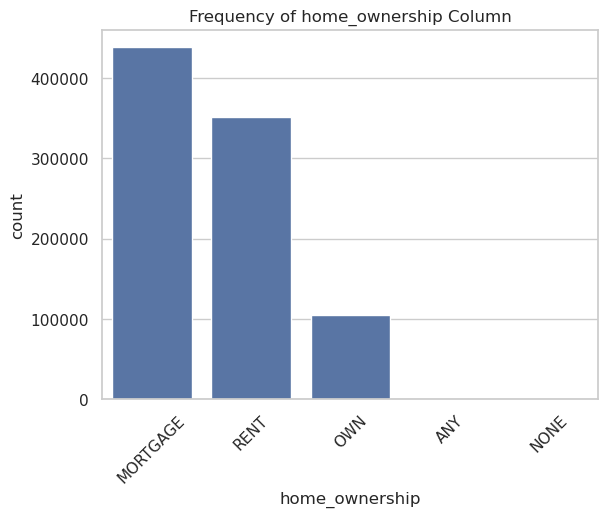

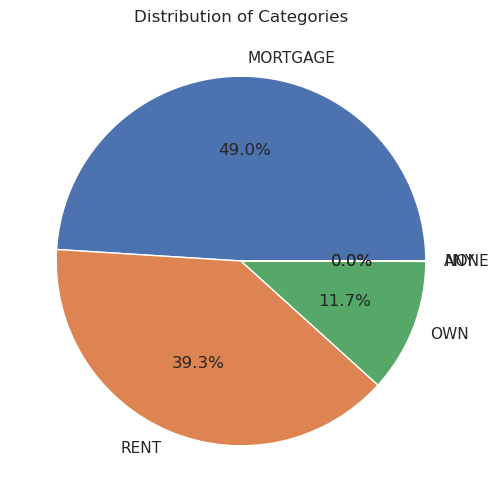

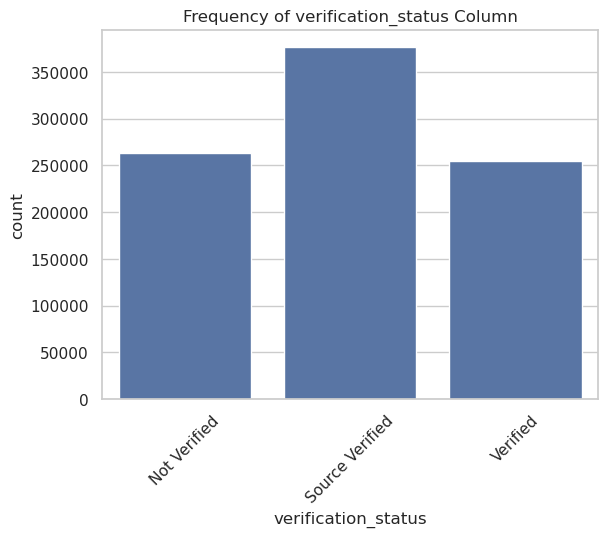

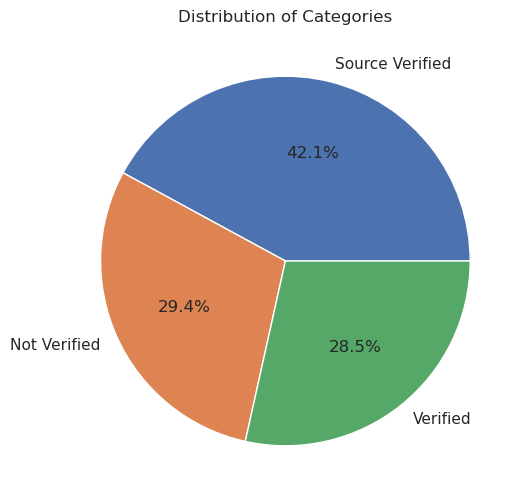

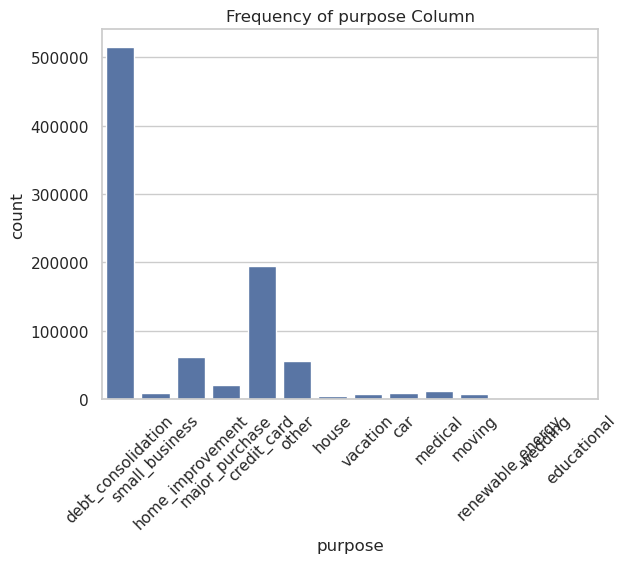

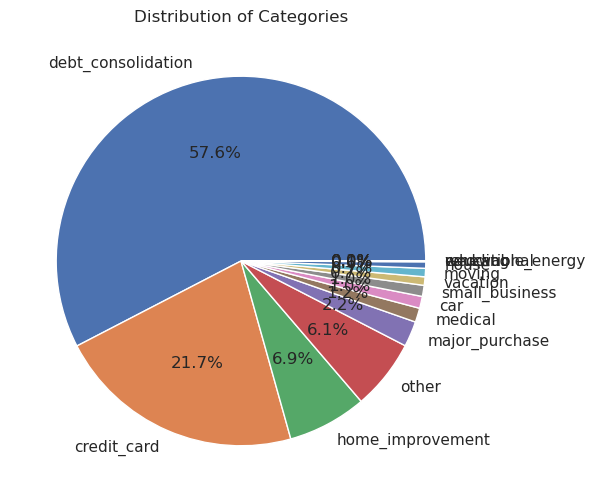

In [35]:
variables = ['term',
            'grade',
            'emp_length',
            'home_ownership',
            'verification_status',
            'purpose',
]

for variable in variables:
    # Bar plot
    sns.countplot(x=variable, data=df)
    plt.title(f'Frequency of {variable} Column')
    plt.xticks(rotation=45)
    plt.show()
    
    # Value counts
    df[variable].value_counts()
    
    # Pie chart (optional)
    df[variable].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
    plt.ylabel('')
    plt.title('Distribution of Categories')
    plt.show()

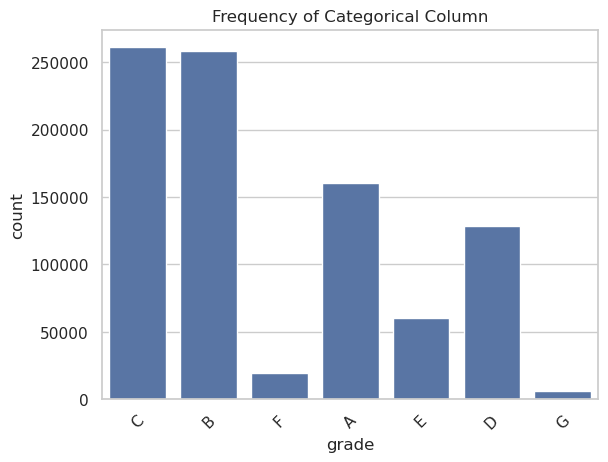

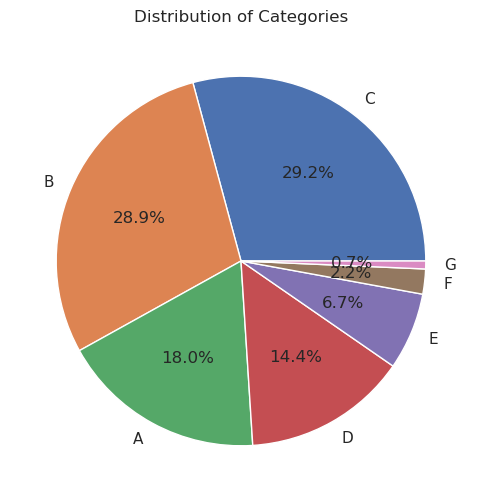

In [36]:


# Bar plot
sns.countplot(x='grade', data=df)
plt.title('Frequency of Categorical Column')
plt.xticks(rotation=45)
plt.show()

# Value counts
df['grade'].value_counts()

# Pie chart (optional)
df['grade'].value_counts().plot.pie(autopct='%1.1f%%', figsize=(6,6))
plt.ylabel('')
plt.title('Distribution of Categories')
plt.show()

In [37]:
df['purpose'].value_counts()

purpose
debt_consolidation    515141
credit_card           194421
home_improvement       61916
other                  54994
major_purchase         19891
medical                11074
car                     9315
small_business          8664
vacation                6614
moving                  6570
house                   5054
renewable_energy         589
wedding                    7
educational                1
Name: count, dtype: int64

# Bi-variate Analysis

## Numerical - numerical

In [38]:
numerical_variables

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util']

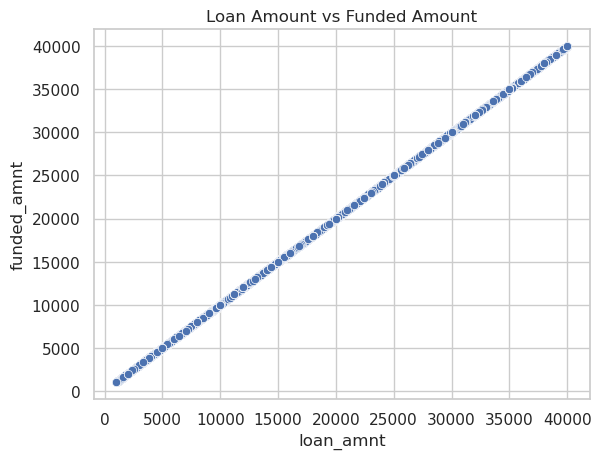

             loan_amnt  funded_amnt
loan_amnt          1.0          1.0
funded_amnt        1.0          1.0


In [39]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot
sns.scatterplot(x='loan_amnt', y='funded_amnt', data=df)
plt.title('Loan Amount vs Funded Amount')
plt.show()

# Correlation
print(df[['loan_amnt', 'funded_amnt']].corr())

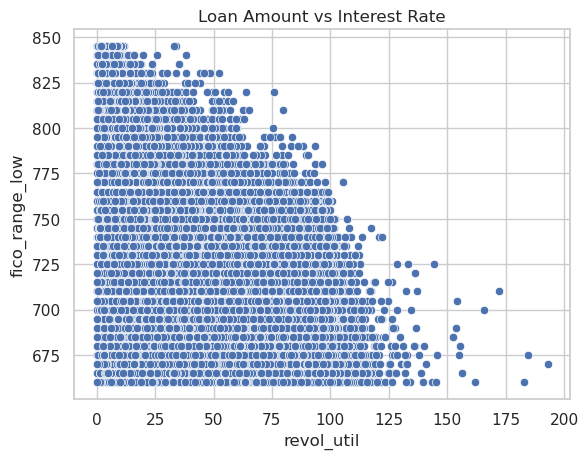

                revol_util  fico_range_low
revol_util        1.000000       -0.458501
fico_range_low   -0.458501        1.000000


In [40]:

# Scatter plot
sns.scatterplot(x='revol_util', y='fico_range_low', data=df)
plt.title('Loan Amount vs Interest Rate')
plt.show()

# Correlation
print(df[['revol_util', 'fico_range_low']].corr())

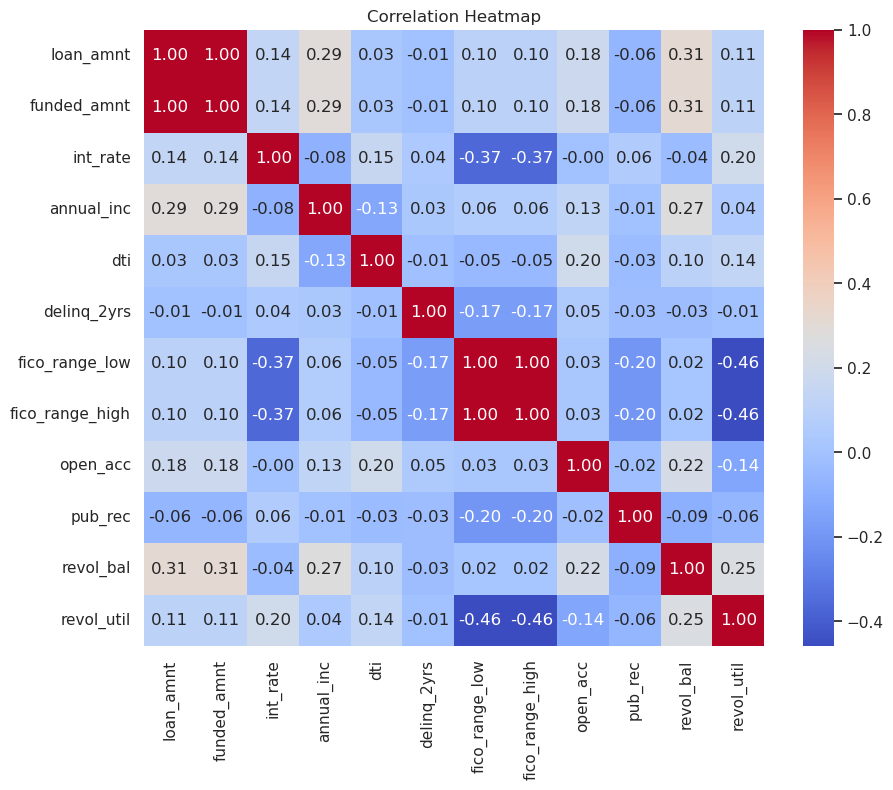

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Example: correlation matrix
corr_matrix = df[numerical_variables].corr()

# Draw the heatmap
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')  # annot=True to show numbers
plt.title('Correlation Heatmap')
plt.show()

## Categorical - Categorical

In [42]:
variables = ['term',
             'grade',
             'emp_length',
             'home_ownership',
             'verification_status',
             'purpose',]

default         0       1
term                     
36 months  565756  119429
60 months  136435   72631
Chi-square statistic: 28461.84928528501, p-value: 0.0


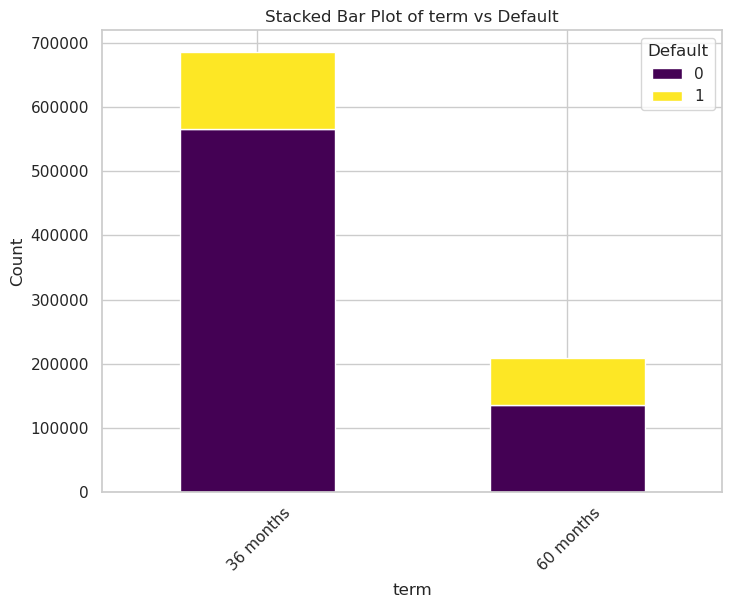

default       0      1
grade                 
A        150518  10032
B        220712  37435
C        197840  63228
D         85559  42872
E         35062  25253
F          9650   9927
G          2850   3313
Chi-square statistic: 70079.34976116262, p-value: 0.0


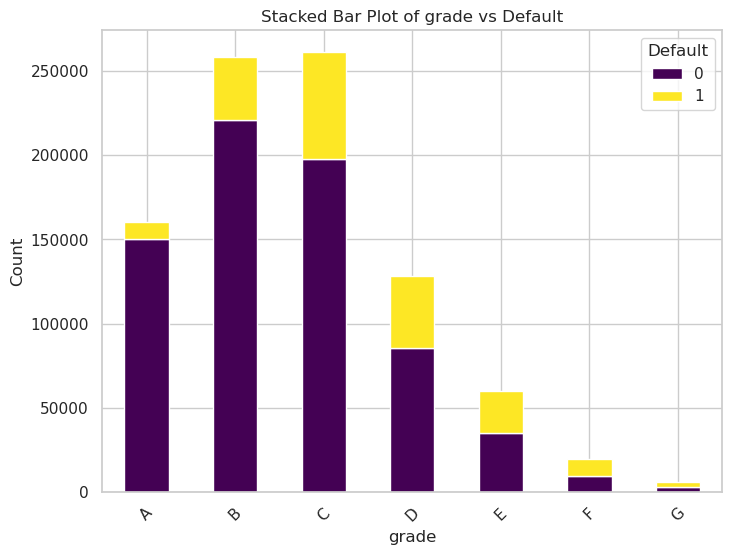

default          0      1
emp_length               
1 year       46419  13472
10+ years   279849  75815
2 years      64095  17596
3 years      56497  15637
4 years      41951  11451
5 years      42604  11598
6 years      29576   7755
7 years      26970   7223
8 years      30695   8316
9 years      26587   7094
< 1 year     56948  16103
Chi-square statistic: 75.7345187051524, p-value: 3.4226681148078142e-12


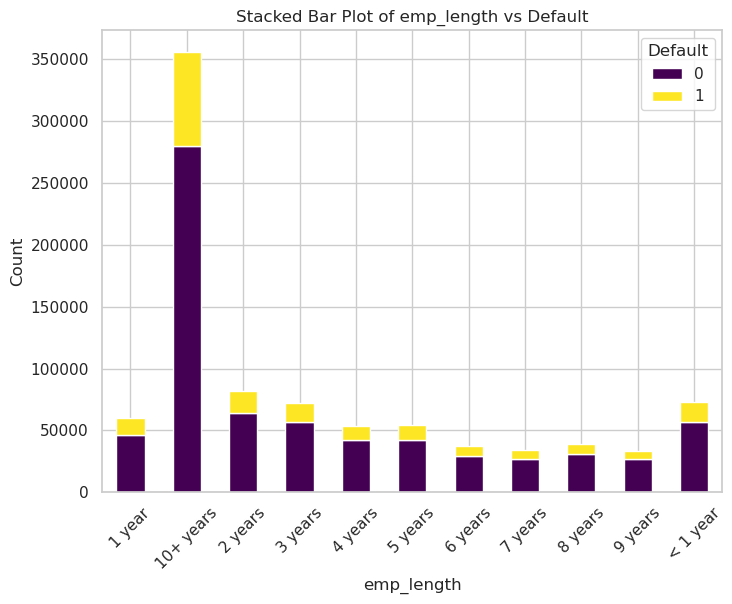

default              0      1
home_ownership               
ANY                229     56
MORTGAGE        358527  79726
NONE                 3      0
OWN              81640  22842
RENT            261792  89436
Chi-square statistic: 6125.527129999809, p-value: 0.0


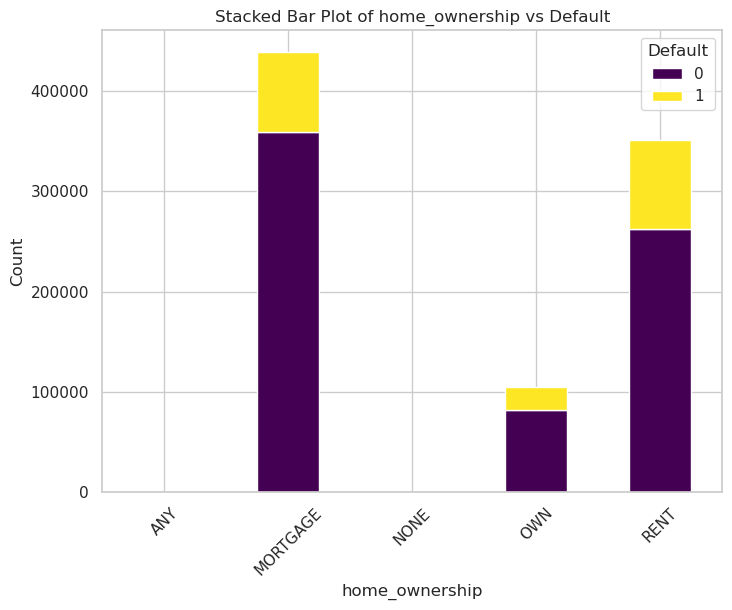

default                   0      1
verification_status               
Not Verified         221877  41379
Source Verified      294396  81897
Verified             185918  68784
Chi-square statistic: 9811.740135597145, p-value: 0.0


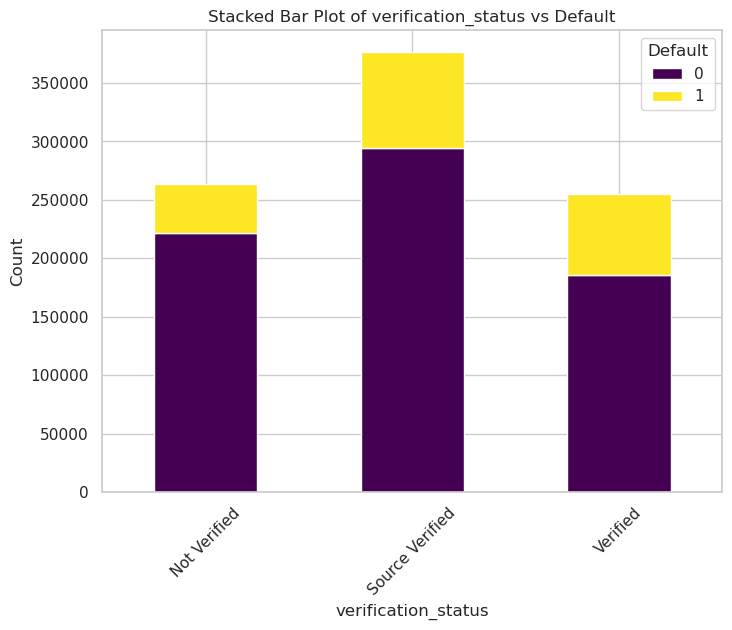

default                  0       1
purpose                           
car                   7798    1517
credit_card         158807   35614
debt_consolidation  397853  117288
educational              1       0
home_improvement     50263   11653
house                 3867    1187
major_purchase       15755    4136
medical               8495    2579
moving                4934    1636
other                42840   12154
renewable_energy       434     155
small_business        5862    2802
vacation              5276    1338
wedding                  6       1
Chi-square statistic: 2786.2070122278474, p-value: 0.0


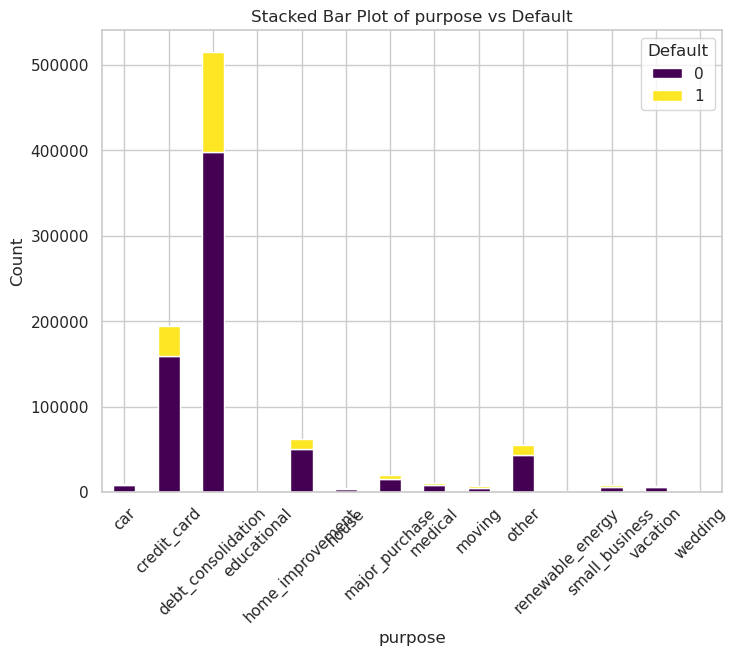

In [43]:
from scipy.stats import chi2_contingency

for variable in variables:

    contingency_table = pd.crosstab(df[variable], df['default'])
    print(contingency_table)
    
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    print(f'Chi-square statistic: {chi2}, p-value: {p}')
    
    # Plot stacked bar
    contingency_table.plot(kind='bar', stacked=True, figsize=(8,6), colormap='viridis')
    
    plt.title(f'Stacked Bar Plot of {variable} vs Default')
    plt.xlabel(f'{variable}')
    plt.ylabel('Count')
    plt.legend(title='Default')
    plt.xticks(rotation=45)
    plt.show()

In [44]:
contingency_table = pd.crosstab(df['emp_title'], df['default'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

default                                   0  1
emp_title                                     
 \tAdv Mtr Proj Fld Rep                   1  0
 \tEmployee Strategies Manager            1  0
 \tOFFICE MANAGER/MEDICAL ASSISTANT       0  1
 \tSecurity Guard                         1  0
   GOVERNMENT ACCOUNT SPECIALIST          0  1
...                                      .. ..
zoning compliance officer                 1  0
zookeeper                                 1  1
zs backroom                               1  0
| Principal Business Solution Architect|  1  0
​License Compliance Investigator          1  0

[210873 rows x 2 columns]
Chi-square statistic: 226245.8590229834, p-value: 1.3818843129750207e-118


In [45]:
df['emp_title'].value_counts()

emp_title
Teacher                          74994
Manager                          15226
Owner                             8874
Registered Nurse                  6553
Supervisor                        6443
                                 ...  
Conveyor Engineer                    1
Client Recruitment Specialist        1
Chief Rocket Scientist               1
RN/staff nurse                       1
Pastoe                               1
Name: count, Length: 210873, dtype: int64

In [46]:
top5 = df['emp_title'].value_counts().nlargest(5).index
df_test = df[df['emp_title'].isin(top5)]

In [47]:
contingency_table = pd.crosstab(df_test['emp_title'], df_test['default'])
print(contingency_table)

chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f'Chi-square statistic: {chi2}, p-value: {p}')

default               0      1
emp_title                     
Manager           11967   3259
Owner              6467   2407
Registered Nurse   5237   1316
Supervisor         5013   1430
Teacher           55093  19901
Chi-square statistic: 326.1178072390107, p-value: 2.508520980910654e-69


## Numerical - Categorical

In [48]:
numerical_variables

['loan_amnt',
 'funded_amnt',
 'int_rate',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'fico_range_low',
 'fico_range_high',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util']

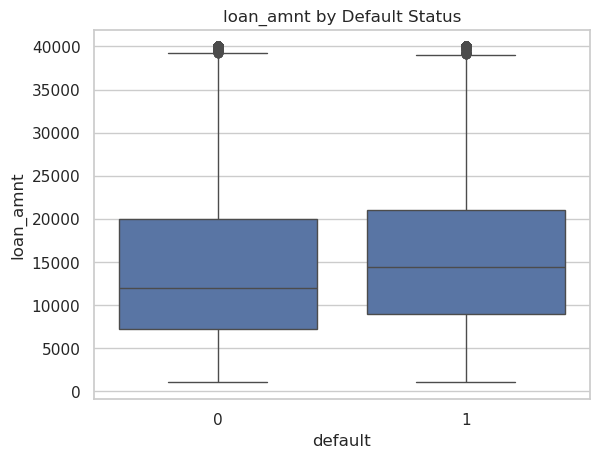

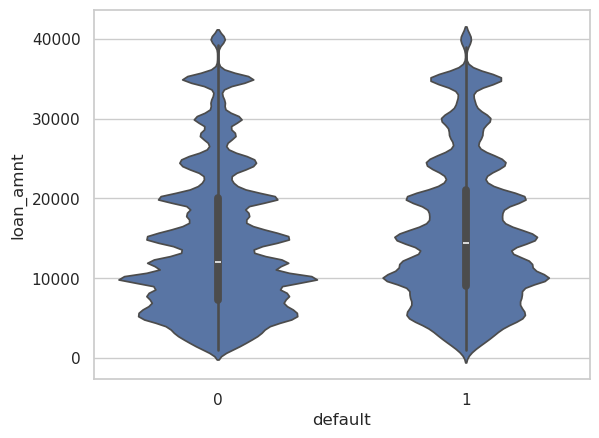

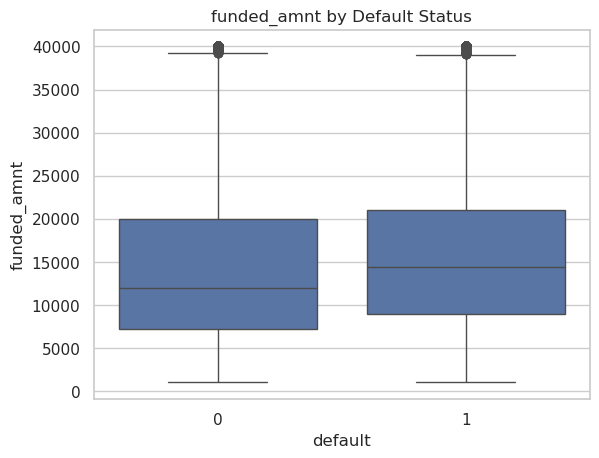

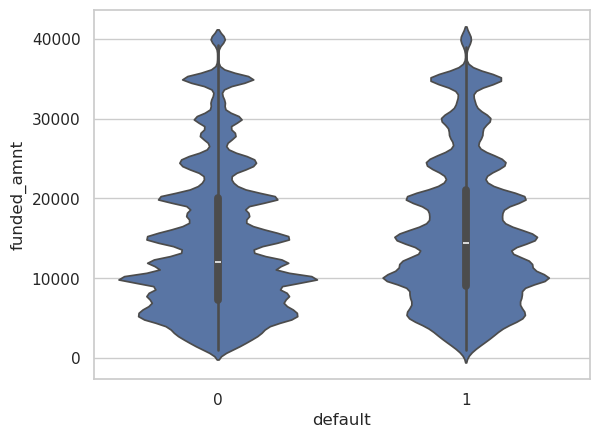

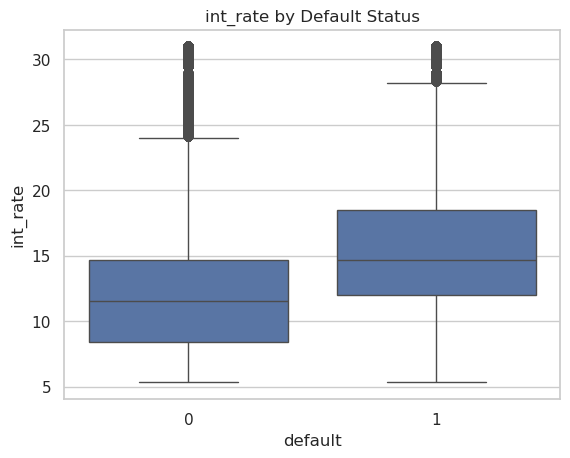

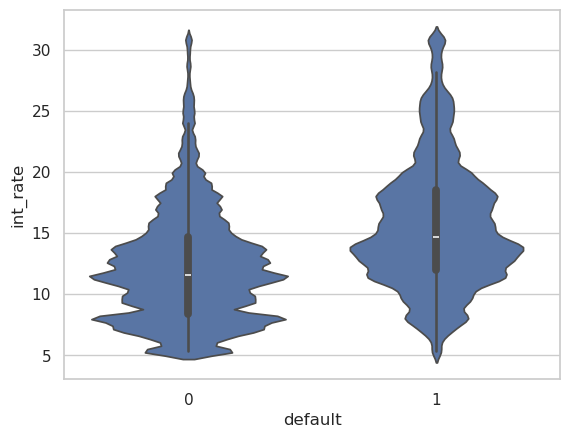

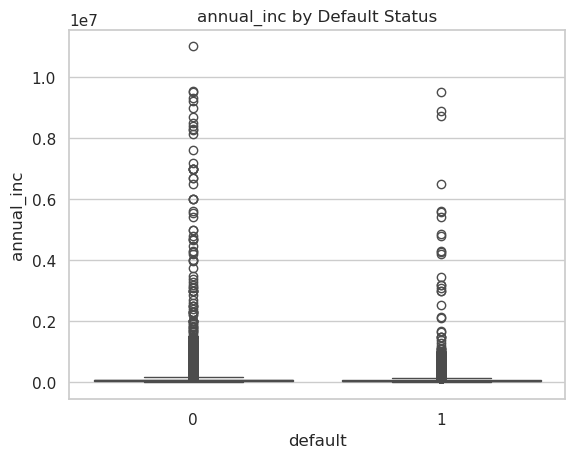

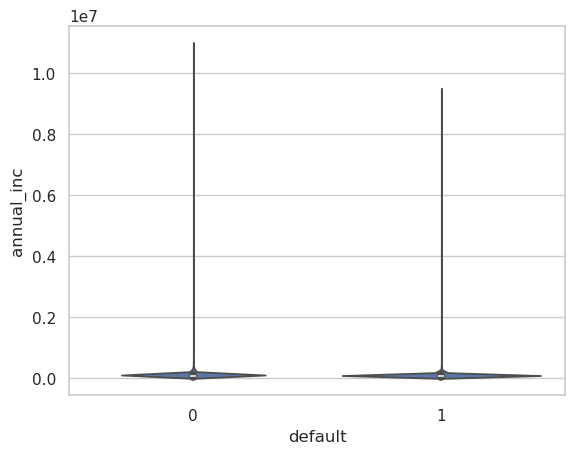

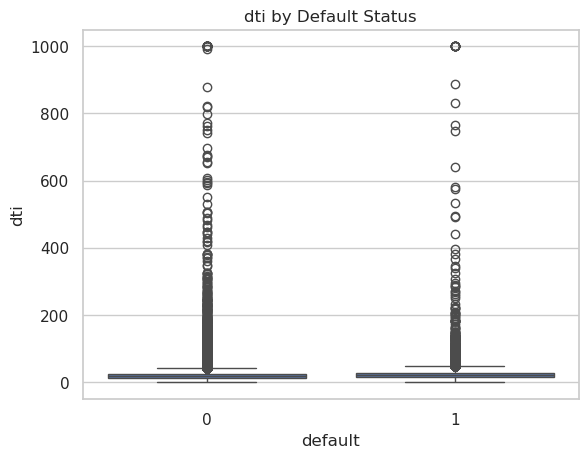

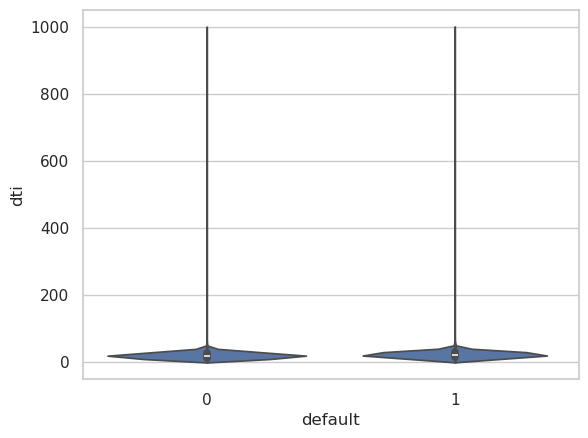

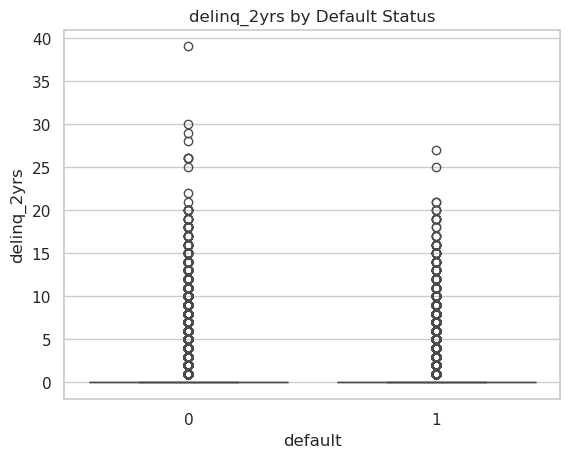

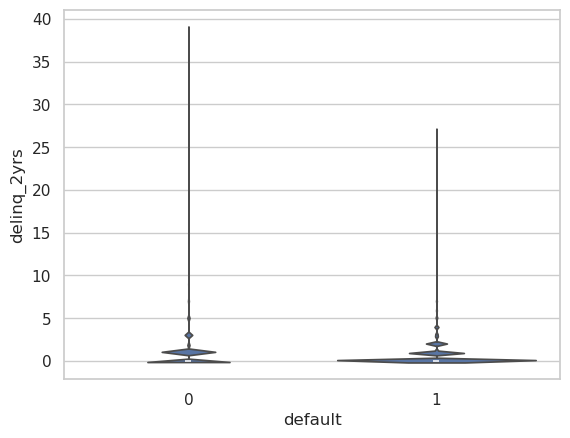

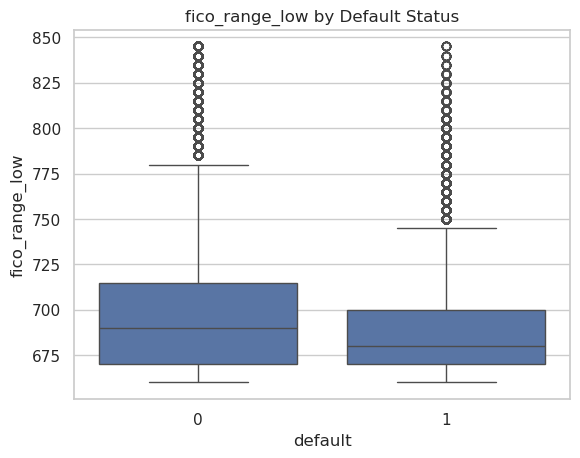

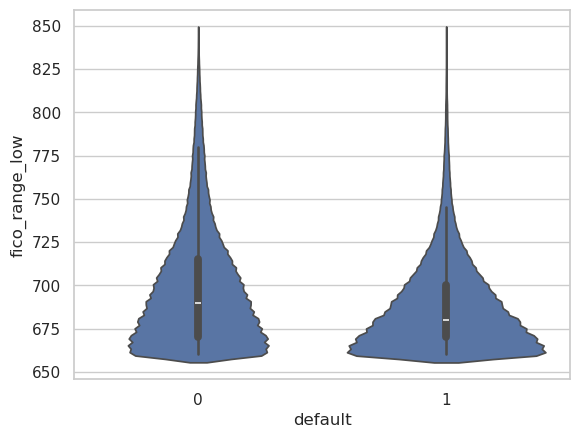

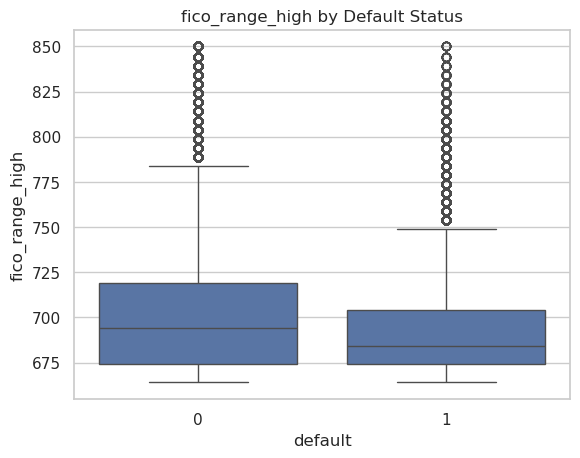

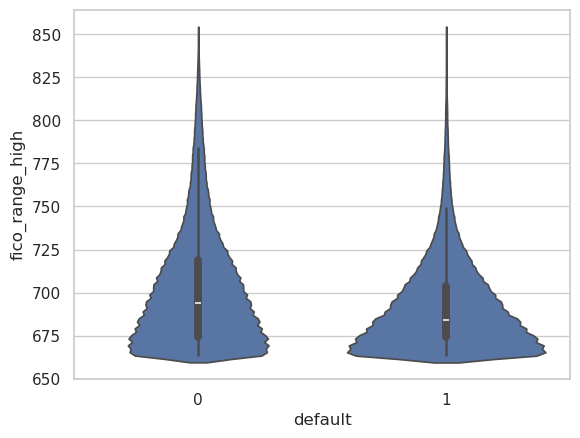

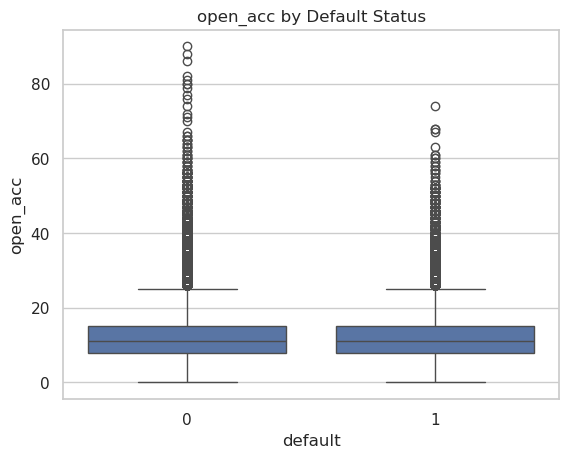

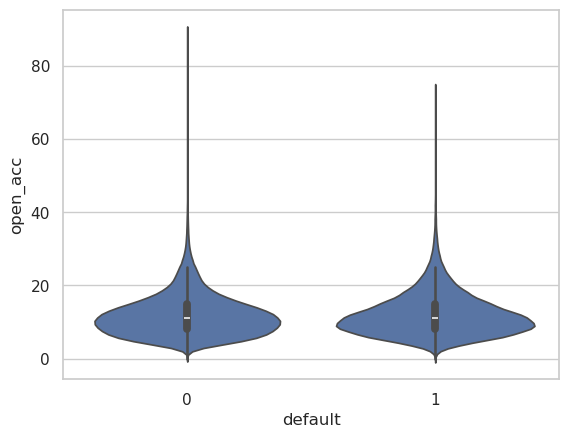

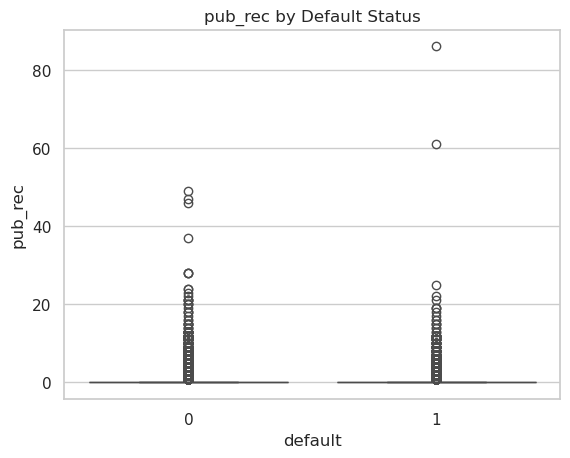

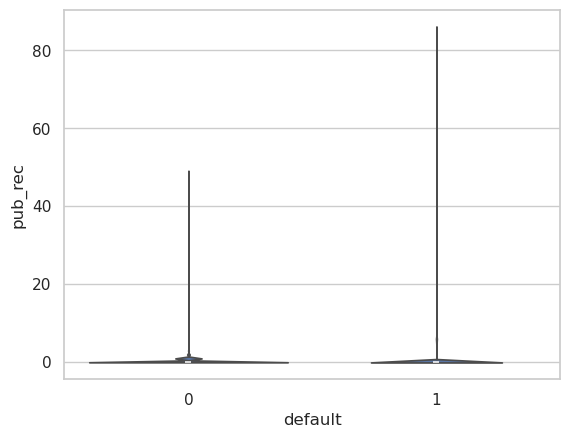

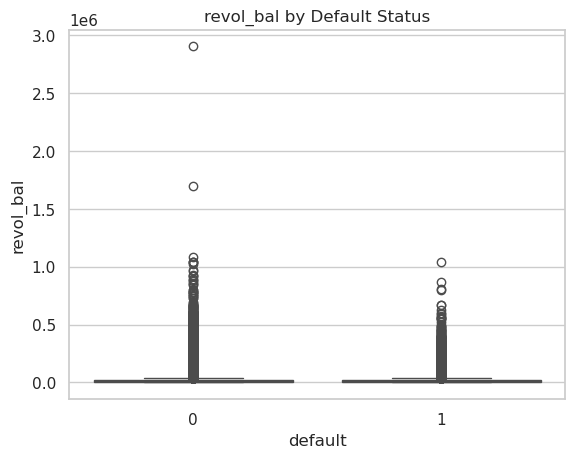

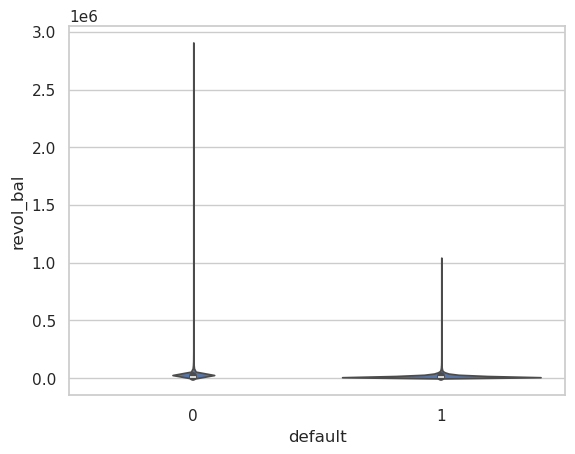

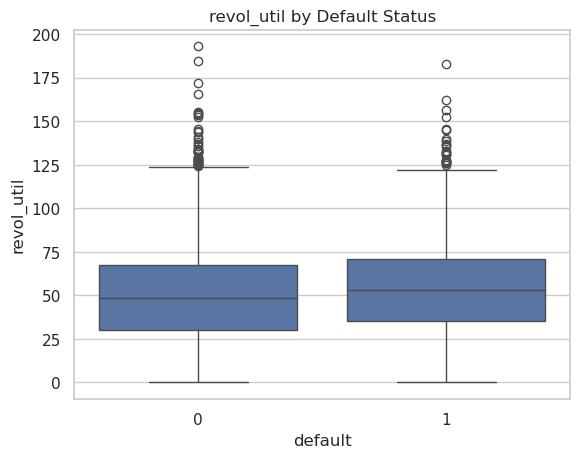

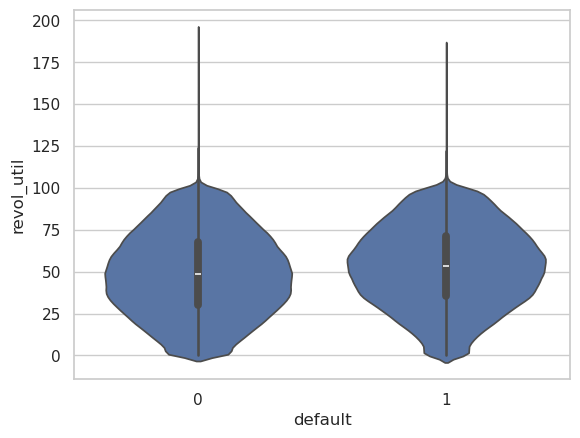

In [49]:
for variable in numerical_variables:

    # Boxplot
    sns.boxplot(x='default', y=variable, data=df)
    plt.title(f'{variable} by Default Status')
    plt.show()
    
    # Violin plot
    sns.violinplot(x='default', y=variable, data=df)
    plt.show()
    
    # Grouped mean
    df.groupby('default')[variable].mean()

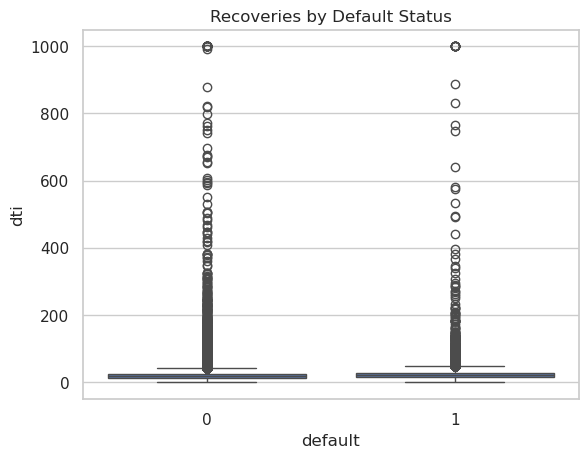

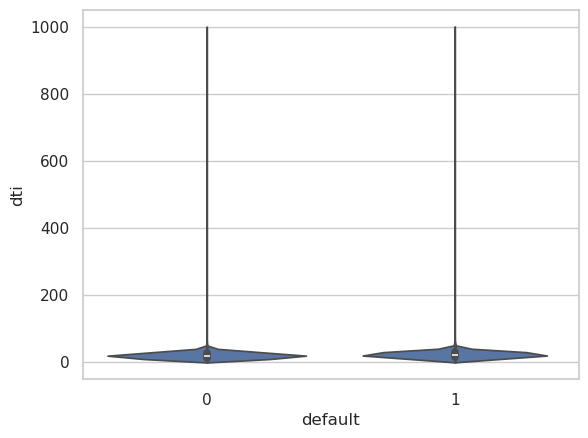

default
0    18.328502
1    20.741963
Name: dti, dtype: float64

In [50]:
# Boxplot
sns.boxplot(x='default', y='dti', data=df)
plt.title('Recoveries by Default Status')
plt.show()

# Violin plot
sns.violinplot(x='default', y='dti', data=df)
plt.show()

# Grouped mean
df.groupby('default')['dti'].mean()